<a href="https://colab.research.google.com/github/Prakashbhanu195/AQI/blob/main/AQIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

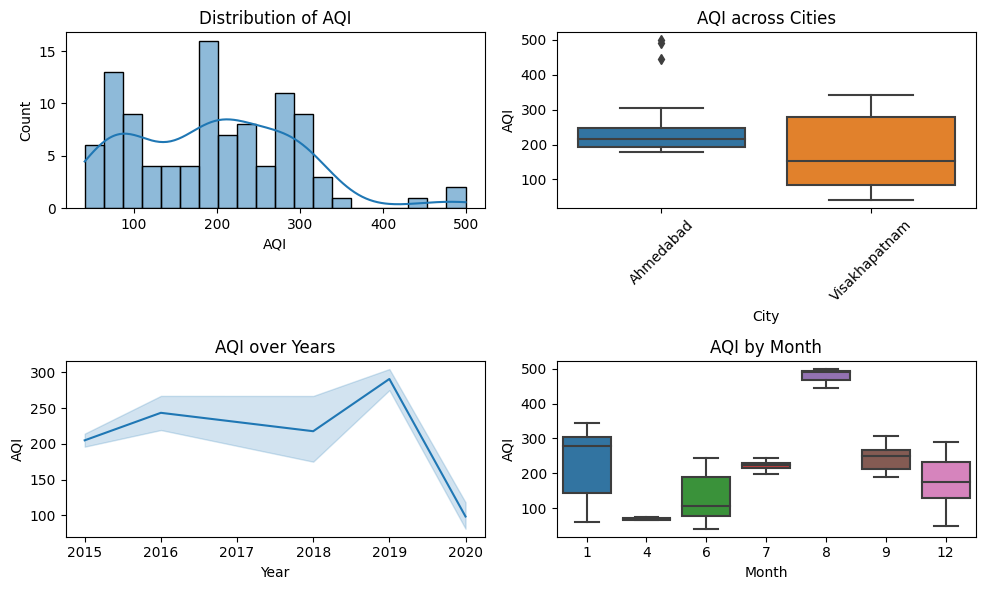

[445.56 209.77 223.64 267.68 124.26 183.18 135.   107.75 214.9  178.51
 211.25 222.6   77.25  78.6  101.96 192.03 149.59 209.06 212.77 211.62
  63.63]
Mean Squared Error: 1261.30
R-squared: 0.88


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Load the dataset
data = pd.read_csv("/content/AQI 15.csv")

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.dropna(inplace=True)  # Remove rows with missing values

# Data Visualization
plt.figure(figsize=(10, 6))

# Distribution of AQI
plt.subplot(2, 2, 1)
sns.histplot(data['AQI'], bins=20, kde=True)
plt.title('Distribution of AQI')

# AQI vs. Cities
plt.subplot(2, 2, 2)
sns.boxplot(x='City', y='AQI', data=data)
plt.xticks(rotation=45)
plt.title('AQI across Cities')

# AQI vs. Year
data['Year'] = data['Date'].dt.year
plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='AQI', data=data)
plt.title('AQI over Years')

# AQI vs. Month
data['Month'] = data['Date'].dt.month
plt.subplot(2, 2, 4)
sns.boxplot(x='Month', y='AQI', data=data)
plt.title('AQI by Month')

plt.tight_layout()
plt.show()

# Feature engineering
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Encode AQI_BUCKET column into numerical values
data['AQI_BUCKET'] = data['AQI_BUCKET'].map({'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4, 'Severe': 5})

# Splitting the data into features (X) and target (y)
X = data.drop(['City', 'Date', 'AQI', 'AQI_BUCKET'], axis=1)
y = data['AQI']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict AQI on test set
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")








